In [1]:
from utils.game_map_class import GameMap
from utils.game_team_class import GameTeam
from utils.strategy_class import Strategy, RandomStrategy, RuleOfThumbStrategy, LookaheadRolloutStrategy
from utils.map_setup_functions import setGameBoardRandom, initializeFullRiskMap, setGameBoardRandomWithTroops
from utils.heuristics import BST_Heuristic, EdgeWin, Countries_Heuristic, BSR_Heuristic

In [2]:
full_risk_map = initializeFullRiskMap()
team_names = ["blue", "red"]
team_strategies = [LookaheadRolloutStrategy, RuleOfThumbStrategy]
risk_map, teams = setGameBoardRandomWithTroops(team_names, full_risk_map, team_strategies)
#risk_map, teams = setGameBoardRandom(team_names, full_risk_map, RandomStrategy)

In [3]:
[(country, risk_map.getTroops(country)) for country in risk_map.getTerritories()]

[('Alaska', 3),
 ('North West Territory', 3),
 ('Alberta', 1),
 ('Ontario', 2),
 ('Quebec', 1),
 ('Western United States', 3),
 ('Eastern United States', 2),
 ('Central America', 2),
 ('Greenland', 1),
 ('Venezuela', 3),
 ('Brazil', 1),
 ('Peru', 2),
 ('Argentina', 3),
 ('Iceland', 2),
 ('Great Britain', 1),
 ('Western Europe', 1),
 ('Northern Europe', 1),
 ('Southern Europe', 3),
 ('Ukraine', 2),
 ('Scandinavia', 4),
 ('Middle East', 1),
 ('Afghanistan', 3),
 ('Ural', 1),
 ('Siberia', 1),
 ('Yakutsk', 1),
 ('Irkutsk', 1),
 ('Mongolia', 1),
 ('China', 2),
 ('India', 2),
 ('Siam', 1),
 ('Kamchatka', 2),
 ('Japan', 4),
 ('Indonesia', 1),
 ('New Guinea', 3),
 ('Western Australia', 2),
 ('Eastern Australia', 2),
 ('Egypt', 1),
 ('North Africa', 3),
 ('East Africa', 1),
 ('Congo', 1),
 ('South Africa', 3),
 ('Madagascar', 2)]

In [4]:
teams[0].getTerritories()

['North Africa',
 'Mongolia',
 'Middle East',
 'Venezuela',
 'Ural',
 'Scandinavia',
 'Brazil',
 'Peru',
 'Western Europe',
 'Western Australia',
 'Iceland',
 'Ontario',
 'Eastern Australia',
 'Egypt',
 'Southern Europe',
 'Alberta',
 'Siam',
 'South Africa',
 'Congo',
 'New Guinea',
 'Central America']

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
pos = {}

pos['Alaska'] = (1,7)
pos['North West Territory'] = (2,7)
pos['Greenland'] = (3,7)
pos['Iceland'] = (4,7)
pos['Scandinavia'] = (5,7)
pos['Alberta'] = (1,6)
pos['Ontario'] = (2,6)
pos['Quebec'] = (3,6)
pos['Great Britain'] = (4,6)
pos['Northern Europe'] = (5,6)
pos['Ukraine'] = (6,6)
pos['Ural'] = (7,6)
pos['Siberia'] = (8,6)
pos['Irkutsk'] = (9,6)
pos['Japan'] = (10,6)
pos['Yakutsk'] = (9,7)
pos['Kamchatka'] = (10,7)
pos['Western United States'] = (1,5)
pos['Eastern United States'] = (2,5)
pos['Western Europe'] = (4,5)
pos['Southern Europe'] = (5,5)
pos['Afghanistan'] = (7,5)
pos['China'] = (8,5)
pos['Mongolia'] = (9,5)
pos['Central America'] = (1,4)
pos['Middle East'] = (7, 4)
pos['India'] = (8,4)
pos['Siam'] = (9,4)
pos['Venezuela'] = (1,3)
pos['Brazil'] = (2,3)
pos['North Africa'] = (4,4)
pos['Egypt'] = (5,4)
pos['Congo'] = (4,3)
pos['East Africa'] = (5,3)
pos['Peru'] = (1,2)
pos['Argentina'] = (2,2)
pos['South Africa'] = (4,2)
pos['Madagascar'] = (5,2)
pos['Indonesia'] = (9,3)
pos['New Guinea'] = (10,3)
pos['Western Australia'] = (9,2)
pos['Eastern Australia'] = (10,2)

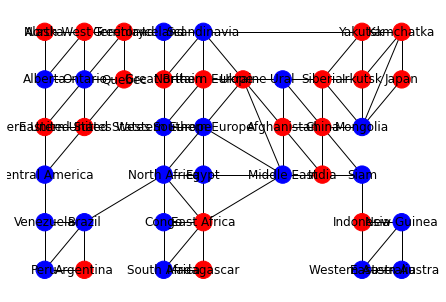

In [7]:
color_map = risk_map.getTeamColorMap()
nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)

In [8]:
teams[0].addTroops('Venezuela', -3)
teams[0].addTroops('Madagascar', -3)

teams[0].getNextMove(depth_ = 1, print_ = True)

Exception: Resulting number of troops cannot be negative

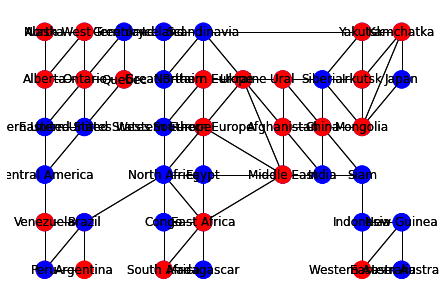

Adding 7 officially to Western Europe!
Team blue officially attacking from Central America to Venezuela!
Attack:  ('Central America', 'Venezuela')
Team blue declares attack on Team red from Central America to Venezuela
Attacking_dice:  [4, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
Team blue officially attacking from Madagascar to East Africa!
Attack:  ('Madagascar', 'East Africa')
Team blue declares attack on Team red from Madagascar to East Africa
Attacking_dice:  [1]
Defending_dice:  [4, 3]
[False]
Attacking Troops Left:  1
Defending Troops Left:  3
Team blue officially attacking from Western Europe to Southern Europe!
Attack:  ('Western Europe', 'Southern Europe')
Team blue declares attack on Team red from Western Europe to Southern Europe
Attacking_dice:  [3, 2, 1]
Defending_dice:  [3, 1]
[False  True]
Attacking Troops Left:  7
Defending Troops Left:  1
Attacking_dice:  [4, 2, 1]
Defending_dice:  [4]
[False]
Attacking Troops Left:  6
Defend

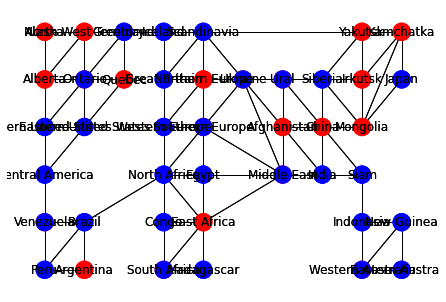

Adding 4 officially to Yakutsk!
Team red officially attacking from East Africa to Egypt!
Attack:  ('East Africa', 'Egypt')
Team red declares attack on Team blue from East Africa to Egypt
Attacking_dice:  [6, 1]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
Team red officially attacking from Alberta to Ontario!
Attack:  ('Alberta', 'Ontario')
Team red declares attack on Team blue from Alberta to Ontario
Attacking_dice:  [5]
Defending_dice:  [5]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
Team red officially attacking from Egypt to Southern Europe!
Attack:  ('Egypt', 'Southern Europe')
Team red declares attack on Team blue from Egypt to Southern Europe
Attacking_dice:  [6]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
Team red officially attacking from China to Ural!
Attack:  ('China', 'Ural')
Team red declares attack on Team blue from China to Ural
Attacking_dice:  [4]
Defending_dice:  [4, 2]
[False]
A

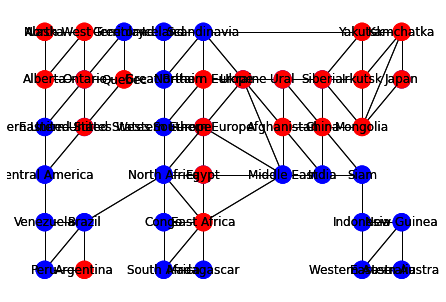

Team blue officially receiving 2
Adding 9 officially to India!
Team blue officially attacking from India to China!
Attack:  ('India', 'China')
Team blue declares attack on Team red from India to China
Attacking_dice:  [6, 4, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  10
Defending Troops Left:  0
Team blue officially attacking from Peru to Argentina!
Attack:  ('Peru', 'Argentina')
Team blue declares attack on Team red from Peru to Argentina
Attacking_dice:  [3, 1]
Defending_dice:  [5]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [4]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
Team blue officially attacking from None to None!


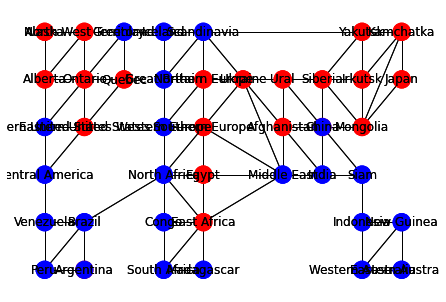

Adding 6 officially to Afghanistan!
Team red officially attacking from Afghanistan to India!
Attack:  ('Afghanistan', 'India')
Team red declares attack on Team blue from Afghanistan to India
Attacking_dice:  [3, 2, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
Team red officially attacking from India to Siam!
Attack:  ('India', 'Siam')
Team red declares attack on Team blue from India to Siam
Attacking_dice:  [6, 5, 4]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
Team red officially attacking from Siam to Indonesia!
Attack:  ('Siam', 'Indonesia')
Team red declares attack on Team blue from Siam to Indonesia
Attacking_dice:  [6, 4, 3]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0
Team red officially attacking from Indonesia to New Guinea!
Attack:  ('Indonesia', 'New Guinea')
Team red declares attack on Team blue from Indonesia to New Guinea
Attacking_dice:  [5, 2, 1]
Defending_dice

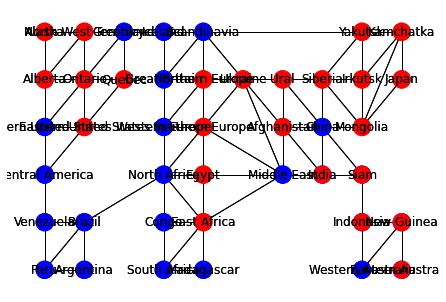

Team blue officially receiving 2
Adding 8 officially to Madagascar!
Team blue officially attacking from Western Australia to Indonesia!
Attack:  ('Western Australia', 'Indonesia')
Team blue declares attack on Team red from Western Australia to Indonesia
Attacking_dice:  [2]
Defending_dice:  [5]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
Team blue officially attacking from None to None!


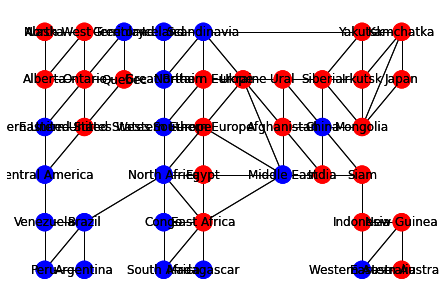

Adding 8 officially to Eastern United States!
Team red officially attacking from Eastern United States to Western United States!
Attack:  ('Eastern United States', 'Western United States')
Team red declares attack on Team blue from Eastern United States to Western United States
Attacking_dice:  [6, 5, 4]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  9
Defending Troops Left:  0
Team red officially attacking from Western United States to Central America!
Attack:  ('Western United States', 'Central America')
Team red declares attack on Team blue from Western United States to Central America
Attacking_dice:  [5, 4, 2]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  8
Defending Troops Left:  0
Team red officially attacking from Central America to Venezuela!
Attack:  ('Central America', 'Venezuela')
Team red declares attack on Team blue from Central America to Venezuela
Attacking_dice:  [5, 4, 3]
Defending_dice:  [5, 3]
[False  True]
Attacking Troops Left:  6
Defending Troops Lef

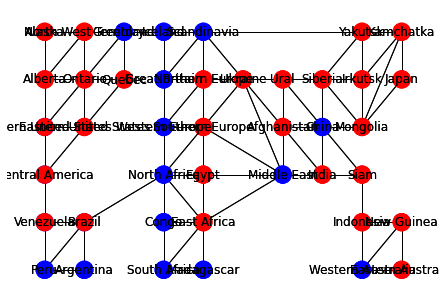

Adding 4 officially to Western Europe!
Team blue officially attacking from None to None!


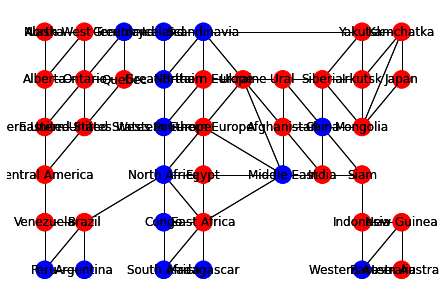

Adding 9 officially to Siberia!
Team red officially attacking from Siberia to China!
Attack:  ('Siberia', 'China')
Team red declares attack on Team blue from Siberia to China
Attacking_dice:  [6, 3, 2]
Defending_dice:  [4, 1]
[ True  True]
Attacking Troops Left:  10
Defending Troops Left:  7
Attacking_dice:  [5, 3, 2]
Defending_dice:  [4, 1]
[ True  True]
Attacking Troops Left:  10
Defending Troops Left:  5
Attacking_dice:  [5, 3, 1]
Defending_dice:  [5, 1]
[False  True]
Attacking Troops Left:  9
Defending Troops Left:  4
Attacking_dice:  [4, 3, 2]
Defending_dice:  [3, 2]
[ True  True]
Attacking Troops Left:  9
Defending Troops Left:  2
Attacking_dice:  [4, 3, 1]
Defending_dice:  [3, 1]
[ True  True]
Attacking Troops Left:  9
Defending Troops Left:  0
Team red officially attacking from None to None!


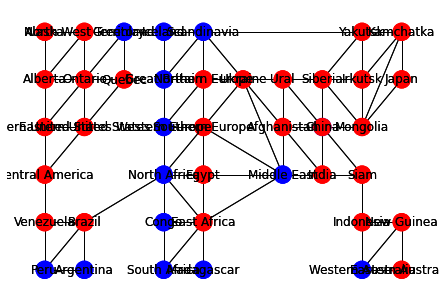

Adding 4 officially to Argentina!
Team blue officially attacking from None to None!


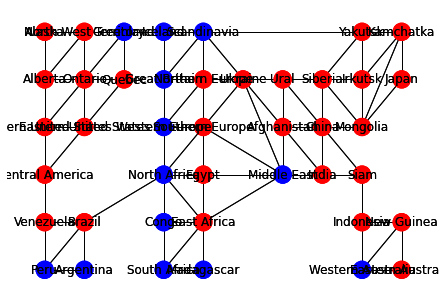

Adding 9 officially to East Africa!
Team red officially attacking from East Africa to South Africa!
Attack:  ('East Africa', 'South Africa')
Team red declares attack on Team blue from East Africa to South Africa
Attacking_dice:  [6, 3, 2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  10
Defending Troops Left:  0
Team red officially attacking from South Africa to Congo!
Attack:  ('South Africa', 'Congo')
Team red declares attack on Team blue from South Africa to Congo
Attacking_dice:  [6, 4, 3]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  9
Defending Troops Left:  0
Team red officially attacking from Congo to North Africa!
Attack:  ('Congo', 'North Africa')
Team red declares attack on Team blue from Congo to North Africa
Attacking_dice:  [4, 2, 1]
Defending_dice:  [4]
[False]
Attacking Troops Left:  7
Defending Troops Left:  1
Attacking_dice:  [4, 3, 1]
Defending_dice:  [4]
[False]
Attacking Troops Left:  6
Defending Troops Left:  1
Attacking_dice:  [6, 4, 3]
Defending_di

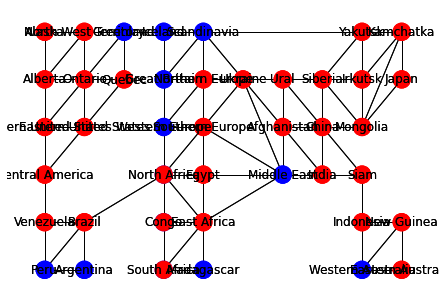

Adding 3 officially to Western Europe!
Team blue officially attacking from Western Europe to Southern Europe!
Attack:  ('Western Europe', 'Southern Europe')
Team blue declares attack on Team red from Western Europe to Southern Europe
Attacking_dice:  [5, 3, 2]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  8
Defending Troops Left:  0
Team blue officially attacking from Southern Europe to Northern Europe!
Attack:  ('Southern Europe', 'Northern Europe')
Team blue declares attack on Team red from Southern Europe to Northern Europe
Attacking_dice:  [4, 3, 2]
Defending_dice:  [5]
[False]
Attacking Troops Left:  6
Defending Troops Left:  1
Attacking_dice:  [6, 3, 2]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
Team blue officially attacking from None to None!


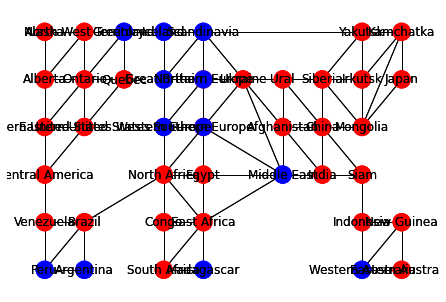

Adding 10 officially to Afghanistan!
Team red officially attacking from North Africa to Western Europe!
Attack:  ('North Africa', 'Western Europe')
Team red declares attack on Team blue from North Africa to Western Europe
Attacking_dice:  [6, 5, 4]
Defending_dice:  [6]
[False]
Attacking Troops Left:  4
Defending Troops Left:  1
Attacking_dice:  [6, 5, 4]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
Team red officially attacking from Afghanistan to Middle East!
Attack:  ('Afghanistan', 'Middle East')
Team red declares attack on Team blue from Afghanistan to Middle East
Attacking_dice:  [6, 5, 2]
Defending_dice:  [6]
[False]
Attacking Troops Left:  10
Defending Troops Left:  1
Attacking_dice:  [4, 3, 2]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  10
Defending Troops Left:  0
Team red officially attacking from Middle East to Southern Europe!
Attack:  ('Middle East', 'Southern Europe')
Team red declares attack on Team blue from Middle East to So

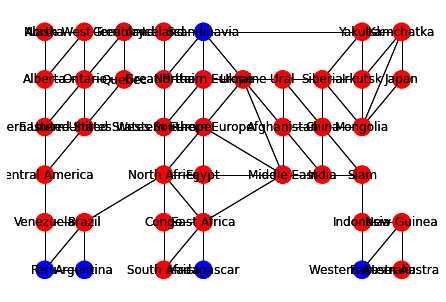

Adding 3 officially to Scandinavia!
Team blue officially attacking from Scandinavia to Iceland!
Attack:  ('Scandinavia', 'Iceland')
Team blue declares attack on Team red from Scandinavia to Iceland
Attacking_dice:  [6, 5, 4]
Defending_dice:  [6]
[False]
Attacking Troops Left:  3
Defending Troops Left:  1
Attacking_dice:  [6, 1]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
Team blue officially attacking from Iceland to Greenland!
Attack:  ('Iceland', 'Greenland')
Team blue declares attack on Team red from Iceland to Greenland
Attacking_dice:  [5]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
Team blue officially attacking from None to None!


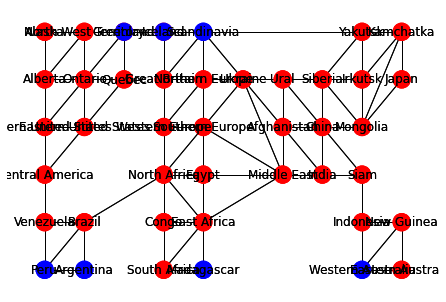

Team red officially receiving 7
Adding 18 officially to South Africa!
Team red officially attacking from South Africa to Madagascar!
Attack:  ('South Africa', 'Madagascar')
Team red declares attack on Team blue from South Africa to Madagascar
Attacking_dice:  [5, 2, 1]
Defending_dice:  [4, 1]
[ True  True]
Attacking Troops Left:  19
Defending Troops Left:  7
Attacking_dice:  [5, 4, 2]
Defending_dice:  [6, 4]
[False False]
Attacking Troops Left:  17
Defending Troops Left:  7
Attacking_dice:  [6, 3, 2]
Defending_dice:  [4, 1]
[ True  True]
Attacking Troops Left:  17
Defending Troops Left:  5
Attacking_dice:  [6, 5, 4]
Defending_dice:  [3, 2]
[ True  True]
Attacking Troops Left:  17
Defending Troops Left:  3
Attacking_dice:  [6, 4, 2]
Defending_dice:  [5, 3]
[ True  True]
Attacking Troops Left:  17
Defending Troops Left:  1
Attacking_dice:  [5, 2, 1]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  17
Defending Troops Left:  0
Team red officially attacking from None to None!


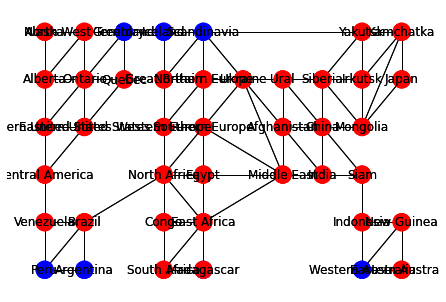

Adding 3 officially to Scandinavia!
Team blue officially attacking from Scandinavia to Great Britain!
Attack:  ('Scandinavia', 'Great Britain')
Team blue declares attack on Team red from Scandinavia to Great Britain
Attacking_dice:  [6, 5, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  3
Defending Troops Left:  1
Attacking_dice:  [5, 4]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
Team blue officially attacking from Great Britain to Northern Europe!
Attack:  ('Great Britain', 'Northern Europe')
Team blue declares attack on Team red from Great Britain to Northern Europe
Attacking_dice:  [2]
Defending_dice:  [6]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
Team blue officially attacking from None to None!


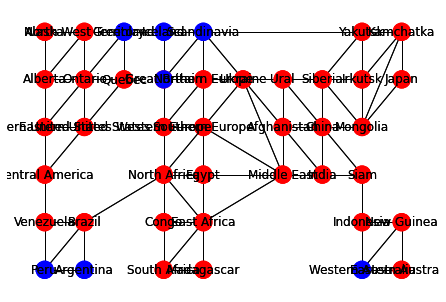

Team red officially receiving 10
Adding 21 officially to Venezuela!
Team red officially attacking from Venezuela to Peru!
Attack:  ('Venezuela', 'Peru')
Team red declares attack on Team blue from Venezuela to Peru
Attacking_dice:  [6, 3, 2]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  22
Defending Troops Left:  0
Team red officially attacking from Peru to Argentina!
Attack:  ('Peru', 'Argentina')
Team red declares attack on Team blue from Peru to Argentina
Attacking_dice:  [6, 5, 2]
Defending_dice:  [6, 4]
[False  True]
Attacking Troops Left:  20
Defending Troops Left:  4
Attacking_dice:  [4, 2, 1]
Defending_dice:  [5, 1]
[False  True]
Attacking Troops Left:  19
Defending Troops Left:  3
Attacking_dice:  [6, 4, 3]
Defending_dice:  [3, 2]
[ True  True]
Attacking Troops Left:  19
Defending Troops Left:  1
Attacking_dice:  [6, 5, 1]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  19
Defending Troops Left:  0
Team red officially attacking from None to None!


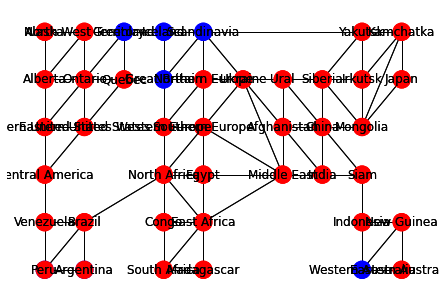

Adding 3 officially to Scandinavia!
Team blue officially attacking from Scandinavia to Ukraine!
Attack:  ('Scandinavia', 'Ukraine')
Team blue declares attack on Team red from Scandinavia to Ukraine
Attacking_dice:  [5, 3, 1]
Defending_dice:  [5]
[False]
Attacking Troops Left:  3
Defending Troops Left:  1
Attacking_dice:  [3, 1]
Defending_dice:  [5]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
Team blue officially attacking from None to None!


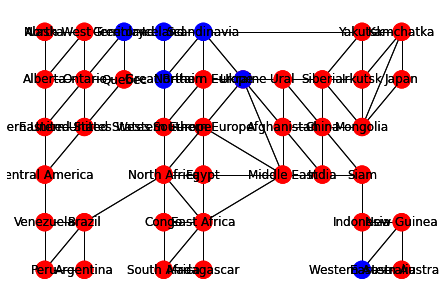

Team red officially receiving 12
Adding 24 officially to Ontario!
Team red officially attacking from Ontario to Greenland!
Attack:  ('Ontario', 'Greenland')
Team red declares attack on Team blue from Ontario to Greenland
Attacking_dice:  [6, 3, 2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  25
Defending Troops Left:  0
Team red officially attacking from Greenland to Iceland!
Attack:  ('Greenland', 'Iceland')
Team red declares attack on Team blue from Greenland to Iceland
Attacking_dice:  [6, 5, 2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  24
Defending Troops Left:  0
Team red officially attacking from Iceland to Great Britain!
Attack:  ('Iceland', 'Great Britain')
Team red declares attack on Team blue from Iceland to Great Britain
Attacking_dice:  [6, 5, 2]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  23
Defending Troops Left:  0
Team red officially attacking from Great Britain to Scandinavia!
Attack:  ('Great Britain', 'Scandinavia')
Team red declares attac

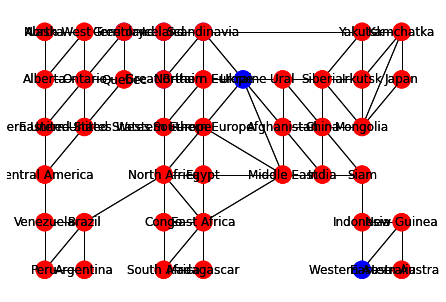

Adding 3 officially to Western Australia!
Team blue officially attacking from Western Australia to Eastern Australia!
Attack:  ('Western Australia', 'Eastern Australia')
Team blue declares attack on Team red from Western Australia to Eastern Australia
Attacking_dice:  [5, 3, 1]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
Team blue officially attacking from Eastern Australia to New Guinea!
Attack:  ('Eastern Australia', 'New Guinea')
Team blue declares attack on Team red from Eastern Australia to New Guinea
Attacking_dice:  [4, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
Team blue officially attacking from New Guinea to Indonesia!
Attack:  ('New Guinea', 'Indonesia')
Team blue declares attack on Team red from New Guinea to Indonesia
Attacking_dice:  [2]
Defending_dice:  [3]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
Team blue officially attacking from None to None!


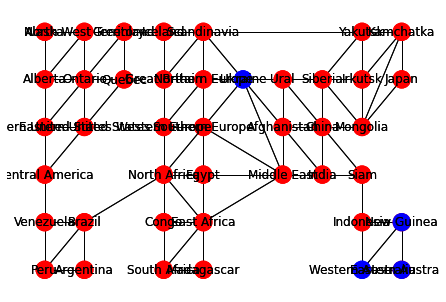

Team red officially receiving 17
Adding 29 officially to Indonesia!
Team red officially attacking from Indonesia to New Guinea!
Attack:  ('Indonesia', 'New Guinea')
Team red declares attack on Team blue from Indonesia to New Guinea
Attacking_dice:  [6, 5, 2]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  30
Defending Troops Left:  0
Team red officially attacking from New Guinea to Western Australia!
Attack:  ('New Guinea', 'Western Australia')
Team red declares attack on Team blue from New Guinea to Western Australia
Attacking_dice:  [6, 3, 2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  29
Defending Troops Left:  0
Team red officially attacking from Western Australia to Eastern Australia!
Attack:  ('Western Australia', 'Eastern Australia')
Team red declares attack on Team blue from Western Australia to Eastern Australia
Attacking_dice:  [5, 4, 1]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  28
Defending Troops Left:  0
Team red officially attacking from Scandinav

In [10]:
full_risk_map = initializeFullRiskMap()
team_names = ["blue", "red"]
team_strategies = [LookaheadRolloutStrategy, LookaheadRolloutStrategy]
Heuristics = [BSR_Heuristic, EdgeWin]
#team_strategies = [LookaheadRolloutStrategy, RuleOfThumbStrategy]
risk_map, teams = setGameBoardRandomWithTroops(team_names, full_risk_map, strategy_classes = team_strategies, heuristics = Heuristics)
curr_team = teams[0]
defending_team = teams[1]

counter = 0
while defending_team.hasTeamWon() == False:
    nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)
    color_map = risk_map.getTeamColorMap()
    nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)
    plt.show()
    curr_team.playTurn(depth_ = 1, print_ = False)
    curr_team_temp = curr_team
    curr_team = defending_team
    defending_team = curr_team_temp
    
    counter += 1
print("{defender} team has won in {num_turns} turns".format(defender = defending_team.getName(), num_turns = counter//2))

In [ ]:
full_risk_map = initializeFullRiskMap()
team_names = ["blue", "red"]
team_strategies = [LookaheadRolloutStrategy, LookaheadRolloutStrategy]
#team_strategies = [LookaheadRolloutStrategy, RuleOfThumbStrategy]
risk_map, teams = setGameBoardRandomWithTroops(team_names, full_risk_map, strategy_classes = team_strategies, heuristics = [EdgeWin, BSR_Heuristic])
curr_team = teams[0]
defending_team = teams[1]


In [ ]:
import numpy as np

In [ ]:
%%capture
import random
winner_array = []
winner_count = []
starter_array = []
#winner_array = np.load('winners-look-vs-random.npy').tolist()
#winner_count = np.load('winners_count-look-vs-random.npy').tolist()
#starter_array = np.load('starters-look-vs-random.npy').tolist()
    
   
#winner_array = np.load('winners.npy').tolist()

#starter_array = np.load('starters.npy').tolist()
for _ in range(1):
    full_risk_map = initializeFullRiskMap()
    if random.choice([0, 1]) == 0:
        team_names = ["blue", "red"]
        team_strategies = [RuleOfThumbStrategy, RandomStrategy]
        starter_array.append("blue")
    else:
        team_names = ["red", "blue"]
        team_strategies = [RandomStrategy, RuleOfThumbStrategy]
        starter_array.append("red")
        
    risk_map, teams = setGameBoardRandomWithTroops(team_names, full_risk_map, team_strategies)
    #risk_map, teams = setGameBoardRandom(team_names, full_risk_map, RandomStrategy)
    curr_team = teams[0]
    defending_team = teams[1]
    counter = 0
    winner = True
    while defending_team.hasTeamWon() == False:
        curr_team.playTurn(depth_ = 4)
        curr_team_temp = curr_team
        curr_team = defending_team
        defending_team = curr_team_temp
        color_map = risk_map.getTeamColorMap()
        nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)
        plt.show()
        counter += 1
        if counter > 50:
            winner = False
            break
    if not winner:
        continue
    
    winner_array.append(defending_team.getName())
    winner_count.append(counter // 2)
    
    np.save('winners-rule-vs-random.npy', np.array(winner_array))
    np.save('starters-rule-vs-random.npy', np.array(starter_array))
    np.save('winners_count-rule-vs-random.npy', np.array(winner_count))
    print("{defender} team has won in {num_turns} turns".format(defender = defending_team.getName(), num_turns = counter//2))
    
    
    

In [ ]:
%%capture
import random
winner_array = []
winner_count = []
starter_array = []
winner_array = np.load('winners-with-initial-troops.npy').tolist()

starter_array = np.load('starters-with-initial-troops.npy').tolist()
winner_count = np.load('winners_count-with-initial-troops.npy').tolist()
for _ in range(100):
    full_risk_map = initializeFullRiskMap()
    if random.choice([0, 1]) == 0:
        team_names = ["blue", "red"]
        team_strategies = [LookaheadRolloutStrategy, RuleOfThumbStrategy]
        starter_array.append("blue")
    else:
        team_names = ["red", "blue"]
        team_strategies = [RuleOfThumbStrategy, LookaheadRolloutStrategy]
        starter_array.append("red")
        
    risk_map, teams = setGameBoardRandomWithTroops(team_names, full_risk_map, team_strategies)
    #risk_map, teams = setGameBoardRandom(team_names, full_risk_map, RandomStrategy)
    curr_team = teams[0]
    defending_team = teams[1]
    counter = 0
    winner = True
    while defending_team.hasTeamWon() == False:
        curr_team.playTurn(depth_ = 4)
        curr_team_temp = curr_team
        curr_team = defending_team
        defending_team = curr_team_temp
        color_map = risk_map.getTeamColorMap()
        nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)
        plt.show()
        counter += 1
        if counter > 50:
            winner = False
            break
    if not winner:
        continue
    winner_array.append(defending_team.getName())
    winner_count.append(counter // 2)
    
    np.save('winners-with-initial-troops.npy', np.array(winner_array))
    np.save('starters-with-initial-troops.npy', np.array(starter_array))
    np.save('winners_count-with-initial-troops.npy', np.array(winner_count))
    print("{defender} team has won in {num_turns} turns".format(defender = defending_team.getName(), num_turns = counter//2))
    
    
    

In [ ]:
%%capture
import random
winner_array = []
winner_count = []
starter_array = []
winner_array = np.load('winners-with-continent-bonuses.npy').tolist()

starter_array = np.load('starters-with-continent-bonuses.npy').tolist()
winner_count = np.load('winners_count-with-continent-bonuses.npy').tolist()
for _ in range(68):
    full_risk_map = initializeFullRiskMap()
    if random.choice([0, 1]) == 0:
        team_names = ["blue", "red"]
        team_strategies = [LookaheadRolloutStrategy, RuleOfThumbStrategy]
        starter_array.append("blue")
    else:
        team_names = ["red", "blue"]
        team_strategies = [RuleOfThumbStrategy, LookaheadRolloutStrategy]
        starter_array.append("red")
        
    risk_map, teams = setGameBoardRandomWithTroops(team_names, full_risk_map, team_strategies)
    #risk_map, teams = setGameBoardRandom(team_names, full_risk_map, RandomStrategy)
    curr_team = teams[0]
    defending_team = teams[1]
    counter = 0
    winner = True
    while defending_team.hasTeamWon() == False:
        curr_team.playTurn(depth_ = 4)
        curr_team_temp = curr_team
        curr_team = defending_team
        defending_team = curr_team_temp
        color_map = risk_map.getTeamColorMap()
        nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)
        plt.show()
        counter += 1
        if counter > 50:
            winner = False
            break
    if not winner:
        continue
    winner_array.append(defending_team.getName())
    winner_count.append(counter // 2)
    
    np.save('winners-with-continent-bonuses.npy', np.array(winner_array))
    np.save('starters-with-continent-bonuses.npy', np.array(starter_array))
    np.save('winners_count-with-continent-bonuses.npy', np.array(winner_count))
    print("{defender} team has won in {num_turns} turns".format(defender = defending_team.getName(), num_turns = counter//2))
    
    
    

In [ ]:
import numpy as np

In [ ]:
c = 0
for i in range(len(a)):
    ai = a[i]
    bi = b[i]
    if ai == 'blue':
        c += 1
c
        